# Preoject: Predicting email is spam or ham

In [4]:
import nltk

In [3]:
#nltk.download_shell()



In [74]:
#messages=[line.strip() for line in open('smsspamcollection/SMSSpamCollection')]


In [75]:
#messages[0]

In [76]:
#print(len(messages))

. Let's print the first ten messages and number them using enumerate:

In [77]:
for message_no ,message in enumerate(messeges[:10]):
    print(message_no, message)
    print('\n')

NameError: name 'messeges' is not defined

instead of these we can use pandas 

In [78]:
import pandas as pd


In [79]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                     names=['label','message'])

In [80]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Exploratory Data Analaysis

In [81]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [82]:
messages.groupby('label').count()

,message
label,
ham,4825
spam,747


In [83]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [84]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Explaratory Data Analysis

In [85]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [86]:
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

**Data Visualization**

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

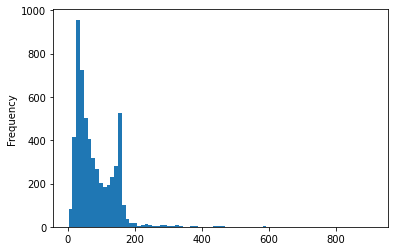

In [88]:
messages['length'].plot(bins=80,kind='hist')

In [89]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [90]:
messages[messages['length']== 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

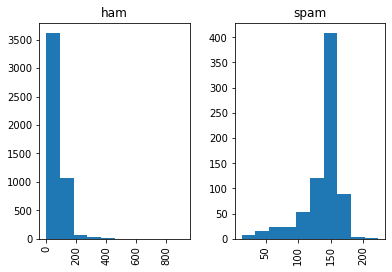

In [91]:
messages.hist(column='length',by='label')

# Text Pre-processig 

In [92]:
import string


In [93]:
mess='Sample message! Notice: it has punctuation.'

In [94]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [96]:
nopunc

'Sample message Notice it has punctuation'

Now Removing Stopwords

In [97]:
from nltk.corpus import stopwords

In [98]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [99]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [100]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [101]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Create functionn and apply it to our DataFrame

In [102]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [103]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [104]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

Since there are so many messages, we xan expect a lot of zoro counts for the presence word n that document bcoz of this,Scikit Learn will output a Sparse meatrix

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [107]:
message4=messages['message'][3]

In [108]:
print(message4)

U dun say so early hor... U c already then say...


vector representation

In [109]:
bow4=bow_transformer.transform([message4])
print(bow4)


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [110]:
print(bow4.shape)

(1, 11425)


In [111]:
print(bow_transformer.get_feature_names()[4068])

U


In [112]:
print(bow_transformer.get_feature_names()[9554])

say


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages

In [113]:
messages_bow=bow_transformer.transform(messages['message'])

In [114]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


# TF-IDF

In [115]:
from sklearn.feature_extraction.text import TfidfTransformer

In [116]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


IDE of the word 'u' and 'univercity'

In [117]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


to transform entire bag-of-words corpus into TF-IDF corpus at once

In [118]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

# Traning a model

choosing navie bayes classifer

In [121]:
from  sklearn.naive_bayes import MultinomialNB

In [122]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

let's try classifiying our single ramdol message and checking hoe we do:

In [130]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('epected:',messages.label[3])

predicted: ham
epected: ham


# Model Eavaluation

In [132]:
all_predictions=spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


Report Classifictions

In [133]:
from sklearn.metrics import classification_report 

In [134]:
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



Such evaluatioln tells us nothing about the true predictive power of our model . if we simply remembered each example during training , the same accurancy in trainng data would be 200% , even through we wouldn't be able to classify any new messages

we are using train test slplit

## Train Test Split

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
msg_train, msg_test, label_train, label_test=train_test_split(messages['message'],messages['label'], test_size=0.2)

In [142]:
print(len(msg_train),len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [143]:
#test size is the 20% of the entire datasets

## Creating a pipeline

In [144]:
from sklearn.pipeline import Pipeline

In [148]:
pipeline=Pipeline([
    
    ('bow',CountVectorizer(analyzer=text_process)), #string to tocken integer counts
    ('tfidf',TfidfTransformer()), #integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()), #train on TF-IDF vectors w/ Naive Bayes classifier
])

In [149]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002A9B3291798>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [150]:
predictions=pipeline.predict(msg_test)

AttributeError: 'Pipeline' object has no attribute 'ppredict'

In [ ]:
print(classification_report(predictions,label_test))